# Ejemplo de uso de la biblioteca

In [17]:
using Random
using Plots
include("../../OptimimizedNeuralNetwork.jl/src/one_layer_neuronal_network.jl")
include("../../OptimimizedNeuralNetwork.jl/src/activation_functions.jl")
include("../../OptimimizedNeuralNetwork.jl/src/weight-initializer-algorithm/main.jl")
using .OneLayerNeuralNetwork
using .InitialNeuralNetwork

In [18]:
entry_dimesion = 2
number_of_hidden_units = 3
output_dimension = 2

OneLayerNeuralNetwork.RandomWeightsNN(
    entry_dimesion,
    number_of_hidden_units,
    output_dimension
)

La matrix de pesos de las neuronas, W1, es:


3×3 Matrix{Float64}:
 0.861535  0.896356  0.850168
 0.739211  0.86563   0.733151
 0.448357  0.212908  0.162976


La matrix de pesos de la salida, W2, es:


2×3 Matrix{Float64}:
 0.945416  0.505158  0.702458
 0.805432  0.67205   0.904258

In [19]:
S = [1,2,3] 
A = [3 4 1; 4 6 3; 1 1 1]
B = [1 2 3; 3 2 3]
OneLayerNeuralNetwork.FromMatrixNN(S, A, B)

La matrix de pesos de las neuronas, W1, es:


3×4 Matrix{Int64}:
 3  4  1  1
 4  6  3  2
 1  1  1  3


La matrix de pesos de la salida, W2, es:


2×3 Matrix{Int64}:
 1  2  3
 3  2  3

In [20]:
# Variables auxiliares 
S = [1,2,3] 
A = [3 4 1; 4 6 3; 1 1 1]
B = [1 2 3; 3 2 3]
v = [1,2,2]
h = OneLayerNeuralNetwork.FromMatrixNN(S, A, B)
# Ejemplo de evaluación h(v) 
# con función de activación ReLU y ForwardPropagation 
OneLayerNeuralNetwork.ForwardPropagation(h, ActivationFunctions.ReLU,v )

2-element Vector{Int64}:
  86
 114

La red neuronal obtenida es :

La matrix de pesos de las neuronas, W1, es:


5×2 Matrix{Float64}:
 0.0       1.0
 1.33333   3.0
 1.33333   1.0
 1.33333  -1.0
 1.33333  -3.0


La matrix de pesos de la salida, W2, es:


1×5 Matrix{Float64}:
 16.0855  -15.6038  -3.48169  3.40547  0.693147

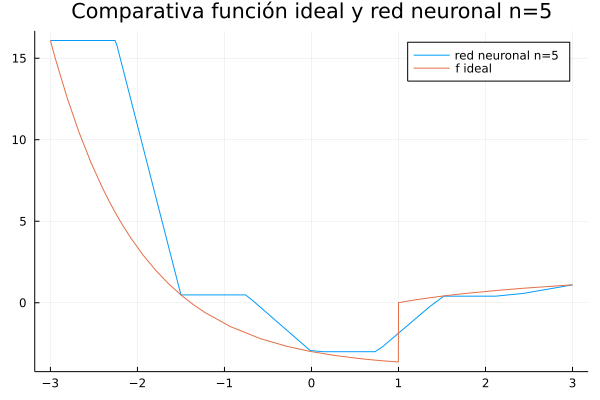

In [21]:
# Declaramos las variables que vamos a seguir
# Función ideal que queremos aproximar
f_regression(x)=(x<1) ? exp(-x)-4 : log(x)
data_set_size = 5 
n = data_set_size # Número de neuronas 
                  # coincide con el tamaño del conjunto
#Partición homogénea del dominio [-3,3]
K_range = 3
X_train= Vector(LinRange(-K_range, K_range, n)) 
Y_train = map(f_regression, X_train) # Imágenes de la partición

M = 1
# USO DE LA FUNCIÓN DE INICIALIZACIÓN DE LOS PESOS
h = InitializeNodes(X_train, Y_train, n, M)

# Imprimimos la red neuronal 
display(Text("La red neuronal obtenida es :"))
println(h)

# Vamos a ver cómo aproxima los resultados 
# Función que dado un punto lo evalúa con ForwardPropagation
# y la función de activación Rampa
evaluate(x)=OneLayerNeuralNetwork.ForwardPropagation(h,
        ActivationFunctions.RampFunction,x)

plot(x->evaluate([x])[1],
     -K_range,K_range, 
     label="red neuronal n=$n")
plot!(f_regression,
    label="f ideal",
    title="Comparativa función ideal y red neuronal n=$n")